In [1]:
!pip install shap
!pip install eli5

In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

import shap
import eli5

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_dataset_path = "/content/drive/MyDrive/Dataset2/train_task_a_only_with_emojis_removed.txt"
test_dataset_path = "/content/drive/MyDrive/Dataset2/test_task_a_only_with_emojis_removed.txt"
df_train = pd.read_csv(train_dataset_path, sep="\t")
df_test = pd.read_csv(test_dataset_path, sep="\t")

In [5]:
df_train['clean_text'] = df_train['text']
df_test['clean_text'] = df_test['text']

X_train = df_train["text"]
X_test = df_test["text"]
y_train = df_train["label"]
y_test = df_test["label"]

In [6]:
len(X_test)

88

In [7]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_test) 

In [8]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
print()
pr, re ,f1,_  = precision_recall_fscore_support(y_test, y_predict, average='micro')
print("Precision", str(pr))
print("Recall", str(re))
print("F1", str(f1))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.70      0.71      0.70        55
           1       0.50      0.48      0.49        33

    accuracy                           0.62        88
   macro avg       0.60      0.60      0.60        88
weighted avg       0.62      0.62      0.62        88

Confusion Matrix: [[39 16]
 [17 16]]

Precision 0.625
Recall 0.625
F1 0.625
AUC: 0.6771349862258954


In [9]:
explainer = shap.Explainer(lr_tfidf, X_train_vectors_tfidf, feature_names=tfidf_vectorizer.get_feature_names())
shap_values = explainer(X_val_vectors_tfidf)

In [10]:
# shap.summary_plot(shap_values, X_val_vectors_tfidf, feature_names=tfidf_vectorizer.get_feature_names())

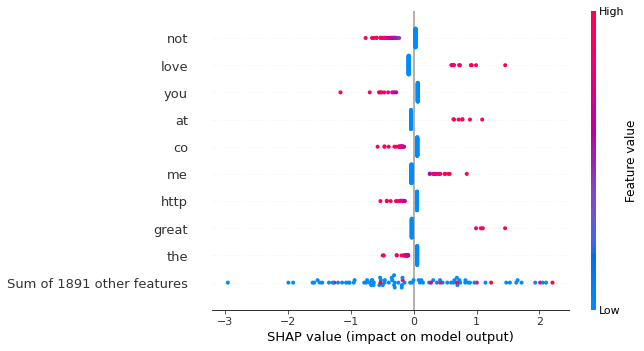

In [11]:
shap.plots.beeswarm(shap_values)#, X_test_array, feature_names=vectorizer.get_feature_names())

In [20]:
shap.initjs()
index = 8
print(X_test[index])
shap.plots.force(shap_values[index])

@CrizzArce happy new year, da! Thanks sobra for this year 


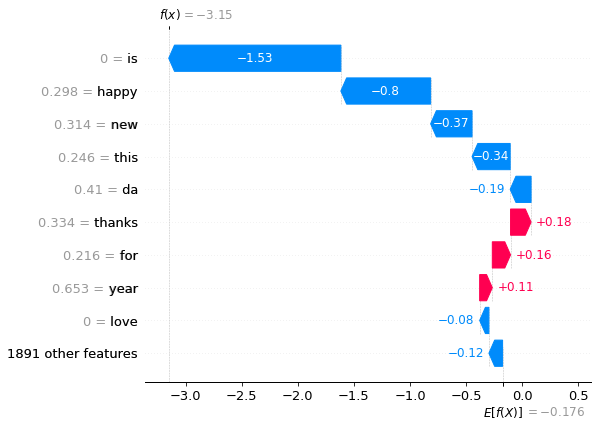

In [13]:
shap.plots.waterfall(shap_values[index])

In [18]:
# shap.plots.bar(shap_values)#[:,"great"])

In [25]:
eli5.show_weights(estimator=lr_tfidf, 
                  feature_names= list(tfidf_vectorizer.get_feature_names()),
                 top=(10000, 10000))

Weight?,Feature
+4.143,fun
+3.686,love
+3.435,at
+3.044,hours
+2.901,great
+2.660,an
+2.280,getting
+2.190,waking
+2.013,monday
+2.012,work
